# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [3]:
def StarFormationRate(L, Type, TIR=0):
    '''
    This function computes the star formation rate of a galaxy
    follwoing Kennicutt And Evans 2012 Eqn 12 (ARA&A 50)
    
    Input:
            L:'float'
                Luminosity of the galaxy in a gievn waveband (erg/s)
            Type:'string'
                The wavelength "FUV", "NUV", "TIR", "Halpha"
            TIR:'float'
                total infrared luminosity in erg/s default =0
    
    Output:
            SFR:'float'
                log of the star formation rate (M_sun/yr)
                
    '''
    
    if (Type=='FUV'):
        logCx =43.35 # calibration from table 1 of (K&E 2012)
        TIRc = 0.46 # correction for dust absorption from table 2
    if (Type == "NUV"):
        logCx = 43.17
        TIRc = 0.27
    if (Type == "Halpha"):
        logCx = 41.27
        TIRc = 0.0024
    if (Type == "TIR"):
        logCx = 43.41
        TIRc = 0.0
    else:
        print('missing wavelength: FUV, NUV, Halpha, TIR')
    
    # correct the luminosity for dust using TIR
    Lnew = L+TIRc*TIR
    
    SFR = np.log10(Lnew) - logCx
    
    return SFR



Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [5]:
const.L_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

In [8]:
LsunErgS = const.L_sun.to(u.erg/u.s).value
LsunErgS

3.828e+33

In [10]:
#  WLM Dwarf Irregular Galaxy
# from NED WLM NUV luminosity 1.71e7 Lsun
# from NEd: WLM NIRluminosity 2.48e6 Lsun +FIR luminosity 7.84e5 Lsun


NUV_WLM = 1.71e7*LsunErgS

TIR_WLM = 2.48e6 *LsunErgS +7.84e5*LsunErgS 

print(StarFormationRate(NUV_WLM, "NUV", TIR_WLM))



missing wavelength: FUV, NUV, Halpha, TIR
-2.3322074670824904


In [ ]:
#  NGC 24 Sc galaxy


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [17]:
def SFRMainSequence(Mstar, z):
    '''
    Function that computs the avergae SFR of a galaxy
    given stellar mass at given redshift
    
    Inputs:
        Mstar:'float'
            stellar mass of galaxy in Msun
        z:'float'
            redshift
    
    Outputs:
        logSFR:'float'
            Log (SFR Msun/yr)
    '''
    
    alpha = 0.7-0.13*z
    beta = 0.38+1.14*z-0.19*z**2
    
    logSFR = alpha*(np.log10(Mstar)-10.5)+beta
    
    return logSFR
    
    

# Step 2

In [18]:
# MW at z=0

MW_disk=8e10

print(10**SFRMainSequence(MW_disk, z=0))

4.5937038237959715


In [19]:
# MW at z = 1

print(10**SFRMainSequence(MW_disk, z=1))

36.287854588142594


# Step 3

In [21]:
# create an array of stellar masses

Mass = np.linspace(1e9, 1e12) # stellar masses from 1e9 to 1e12 dwarf to elliptical


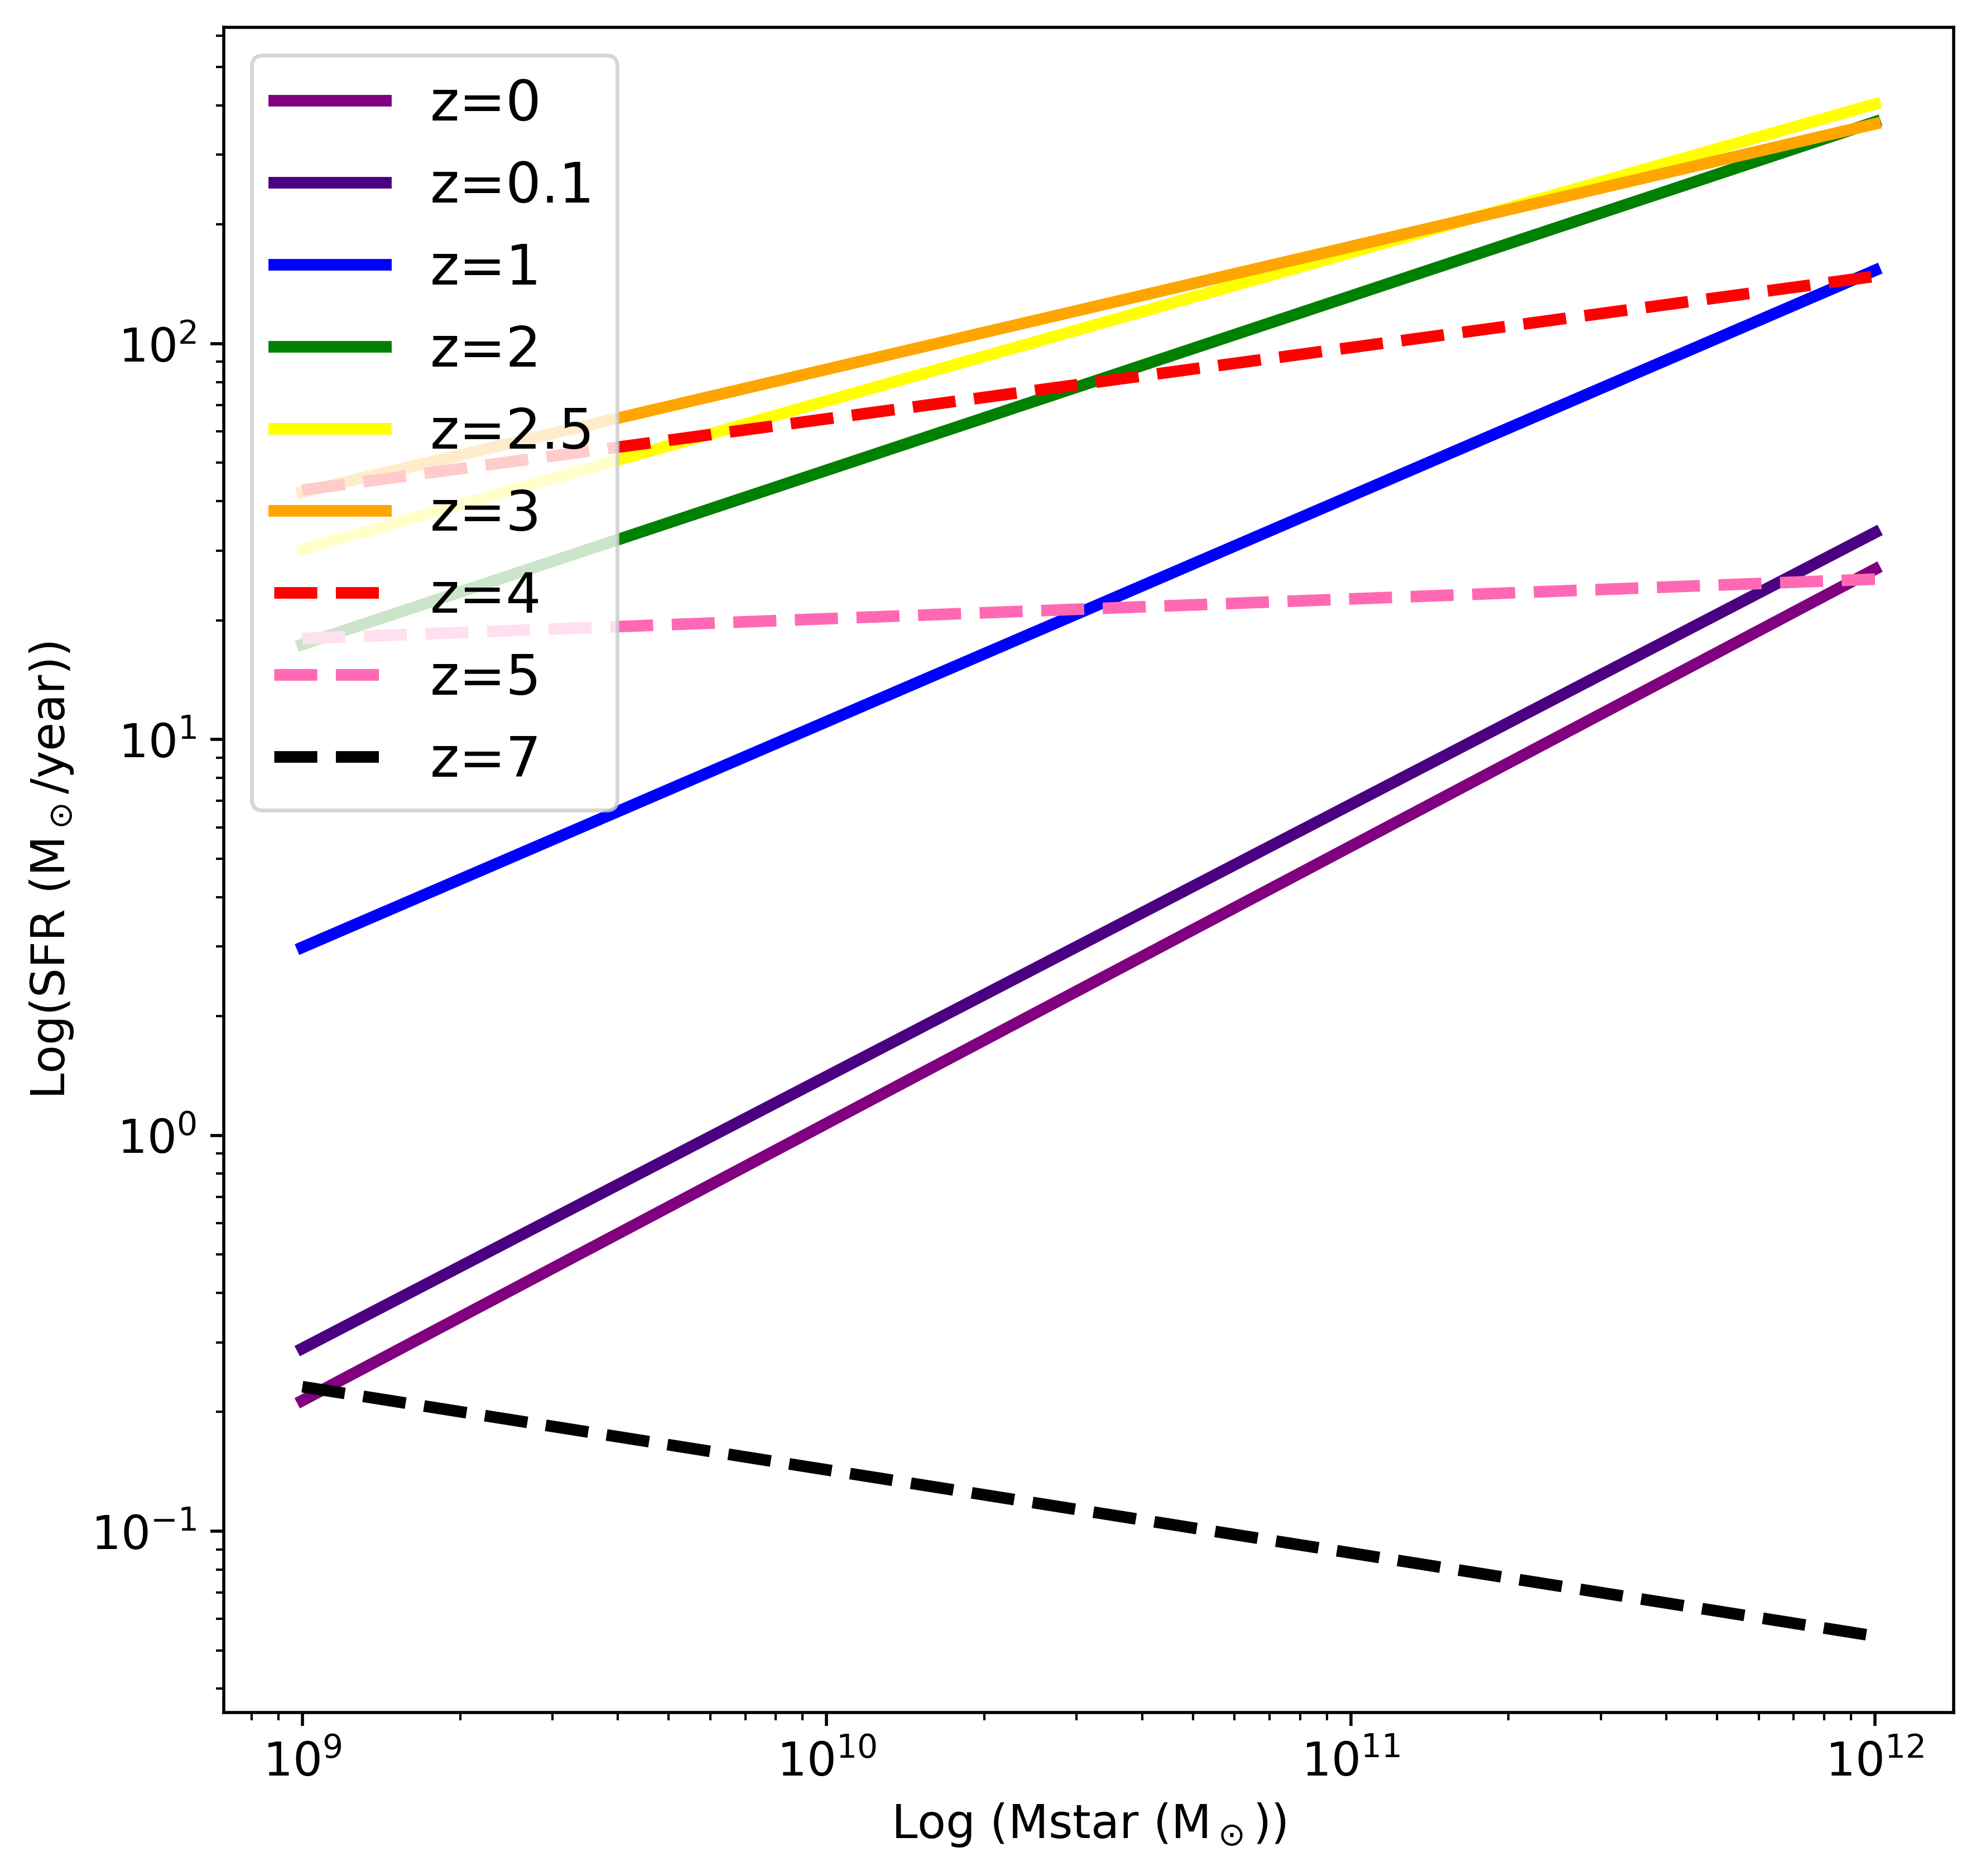

In [41]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass,10**SFRMainSequence(Mass, 0), color='purple', linewidth=3, label='z=0')
plt.loglog(Mass,10**SFRMainSequence(Mass, .1), color='indigo', linewidth=3, label='z=0.1')
plt.loglog(Mass,10**SFRMainSequence(Mass, 1), color='blue', linewidth=3, label='z=1')
plt.loglog(Mass,10**SFRMainSequence(Mass, 2), color='green', linewidth=3, label='z=2')
plt.loglog(Mass,10**SFRMainSequence(Mass, 2.5), color='yellow', linewidth=3, label='z=2.5')
plt.loglog(Mass,10**SFRMainSequence(Mass, 3), color='orange', linewidth=3, label='z=3')
plt.loglog(Mass,10**SFRMainSequence(Mass, 4), color='red', linewidth=3,linestyle='--', label='z=4')
plt.loglog(Mass,10**SFRMainSequence(Mass, 5), color='hotpink', linewidth=3,linestyle='--', label='z=5')
plt.loglog(Mass,10**SFRMainSequence(Mass, 7), color='black', linewidth=3,linestyle='--', label='z=7')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [43]:
# normal galaxies 

TIR_Normal = 1e10 * LsunErgS

print(10**StarFormationRate(TIR_Normal, 'TIR'))

1.4892648150381245


In [44]:
# LIRGs  
TIR_LIRG = 1e11 * LsunErgS

print(10**StarFormationRate(TIR_LIRG, 'TIR'))

14.892648150381245


In [45]:
# ULIRGs
TIR_ULIRG = 1e12 * LsunErgS

print(10**StarFormationRate(TIR_ULIRG, 'TIR'))

148.92648150381245


In [46]:
# HLIRGs

TIR_HLIRG = 1e13 * LsunErgS

print(10**StarFormationRate(TIR_HLIRG, 'TIR'))

1489.2648150381244
